In [9]:
import heapq
from collections import defaultdict, Counter
import networkx as nx
import matplotlib.pyplot as plt

class ChinesePostman:
    def __init__(self):
        self.graph = defaultdict(list)
        self.edges = []

    def add_node(self, u, v, weight):
        self.graph[u].append((v, weight))
        self.graph[v].append((u, weight))
        self.edges.append((u, v, weight))

    def dijkstra(self, start):
        distances = {node: float('inf') for node in self.graph}
        distances[start] = 0
        priority_queue = [(0, start)]
        while priority_queue:
            current_distance, current_node = heapq.heappop(priority_queue)
            if current_distance > distances[current_node]:
                continue
            for neighbor, weight in self.graph[current_node]:
                distance = current_distance + weight
                if distance < distances[neighbor]:
                    distances[neighbor] = distance
                    heapq.heappush(priority_queue, (distance, neighbor))
        return distances

    def find_shortest_path(self, start, end):
        distances = self.dijkstra(start)
        return distances[end]

    def find_odd_degree_nodes(self):
        degree_count = Counter()
        for u, v, _ in self.edges:
            degree_count[u] += 1
            degree_count[v] += 1
        return [node for node, degree in degree_count.items() if degree % 2 != 0]

    def find_min_weight_matching(self, odd_vertices):
        """Find minimum weight perfect matching for odd degree vertices."""
        matches = []
        vertices = odd_vertices.copy()
        while vertices:
            v1 = vertices[0]
            min_cost = float('inf')
            min_v2 = None
            for v2 in vertices[1:]:
                cost = self.find_shortest_path(v1, v2)
                if cost < min_cost:
                    min_cost = cost
                    min_v2 = v2
            matches.append((v1, min_v2, min_cost))
            vertices.remove(v1)
            vertices.remove(min_v2)
        return matches

    def find_eulerian_path(self, graph, start_vertex=None):
        """Find Eulerian path in the graph using Hierholzer's algorithm."""
        if not start_vertex:
            start_vertex = list(graph.keys())[0]
        
        # Create a copy of the graph to modify
        curr_graph = {}
        for v in graph:
            curr_graph[v] = graph[v].copy()
        
        path = []
        stack = [start_vertex]
        
        while stack:
            curr_v = stack[-1]
            if curr_graph[curr_v]:
                next_v = curr_graph[curr_v][0][0]
                weight = curr_graph[curr_v][0][1]
                curr_graph[curr_v].remove((next_v, weight))
                curr_graph[next_v].remove((curr_v, weight))
                stack.append(next_v)
            else:
                path.append(stack.pop())
        
        return path[::-1]

    def solve(self):
        """Solve the Chinese Postman Problem."""
        # Find vertices with odd degree
        odd_vertices = self.find_odd_degree_nodes()
        
        # If no odd vertices, the original graph has an Eulerian circuit
        if not odd_vertices:
            path = self.find_eulerian_path(self.graph)
            total_cost = sum(weight for _, _, weight in self.edges)
            return total_cost, path
            
        # Find minimum weight perfect matching for odd vertices
        min_weight_matches = self.find_min_weight_matching(odd_vertices)
        
        # Create augmented graph by adding edges from matching
        augmented_graph = defaultdict(list)
        for v1, v2 in self.graph.items():
            augmented_graph[v1] = v2.copy()
            
        additional_cost = 0
        for v1, v2, weight in min_weight_matches:
            augmented_graph[v1].append((v2, weight))
            augmented_graph[v2].append((v1, weight))
            additional_cost += weight
            
        # Find Eulerian circuit in the augmented graph
        path = self.find_eulerian_path(augmented_graph)
        total_cost = sum(weight for _, _, weight in self.edges) + additional_cost
        
        return total_cost, path

    def plot_route(self, path):
        """Plot the route with numbered edges to show the order."""
        G = nx.Graph()
        for u, v, weight in self.edges:
            G.add_edge(u, v, weight=weight)
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_size=700)
        labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
        for i in range(len(path) - 1):
            u, v = path[i], path[i + 1]
            nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color='r', width=2)
        plt.show()

Total cost: 16
Path: A -> B -> C -> D -> A -> C -> A


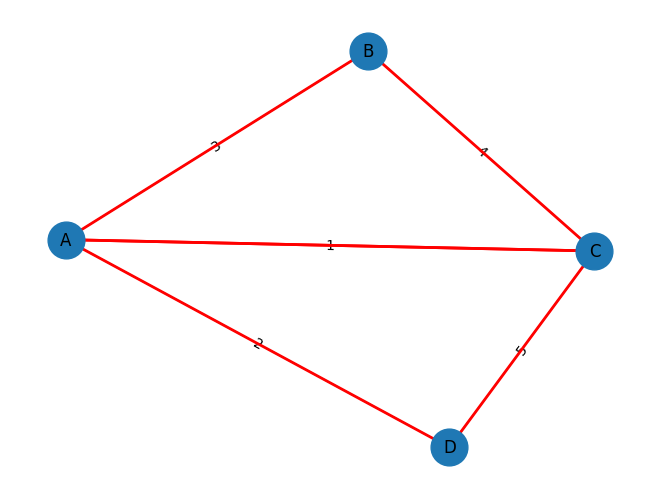

In [10]:
cpp = ChinesePostman()
cpp.add_node('A', 'B', 3) 
cpp.add_node('B', 'C', 4)
cpp.add_node('C', 'D', 5)
cpp.add_node('D', 'A', 2)
cpp.add_node('A', 'C', 1)

total_cost, path = cpp.solve()
print(f"Total cost: {total_cost}")
print(f"Path: {' -> '.join(path)}")
cpp.plot_route(path)

Total cost: 23
Path: A -> B -> C -> A -> D -> B -> E -> C -> D -> E -> F -> D -> A


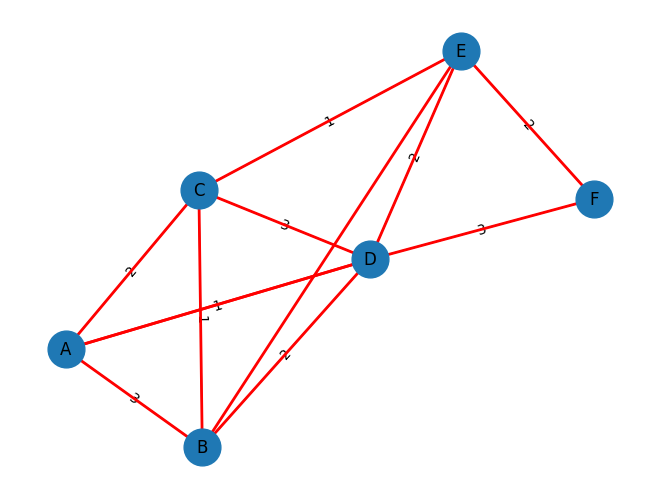

In [11]:
## Run CPP on a larger graph
cpp = ChinesePostman()
cpp.add_node('A', 'B', 3)
cpp.add_node('A', 'C', 2)
cpp.add_node('A', 'D', 1)
cpp.add_node('B', 'C', 1)
cpp.add_node('B', 'D', 2)
cpp.add_node('C', 'D', 3)
cpp.add_node('C', 'E', 1)
cpp.add_node('D', 'E', 2)
cpp.add_node('D', 'F', 3)
cpp.add_node('E', 'F', 2)

total_cost, path = cpp.solve()
print(f"Total cost: {total_cost}")
print(f"Path: {' -> '.join(path)}")

cpp.plot_route(path)

Total cost: 40
Path: 1 -> 2 -> 3 -> 1 -> 5 -> 4 -> 2 -> 4 -> 3 -> 1


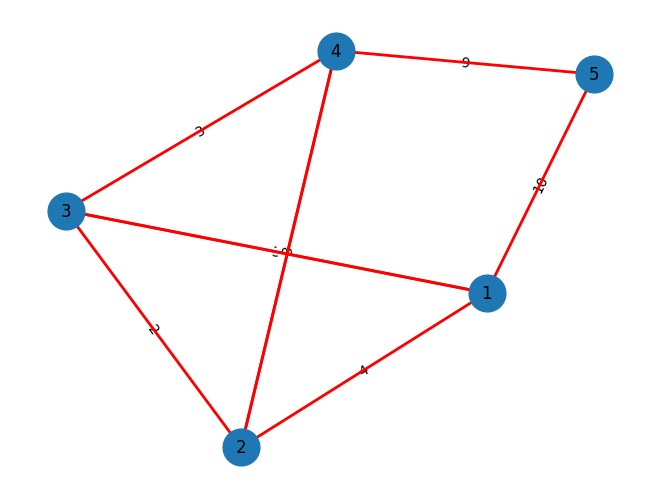

In [13]:
## Run CCP on that graph:
## sailboat = [
##    (1,2,4), (1,3,3), (1,5,10), (2,3,2), (2,4,3), (3,4,3), (4,5,9)
##]
cpp = ChinesePostman()
cpp.add_node(1, 2, 4)
cpp.add_node(1, 3, 3)
cpp.add_node(1, 5, 10)
cpp.add_node(2, 3, 2)
cpp.add_node(2, 4, 3)
cpp.add_node(3, 4, 3)
cpp.add_node(4, 5, 9)

total_cost, path = cpp.solve()

print(f"Total cost: {total_cost}")
print(f"Path: {' -> '.join(map(str, path))}")

cpp.plot_route(path)

Total cost: 8
Path: 1 -> 2 -> 3 -> 4 -> 1


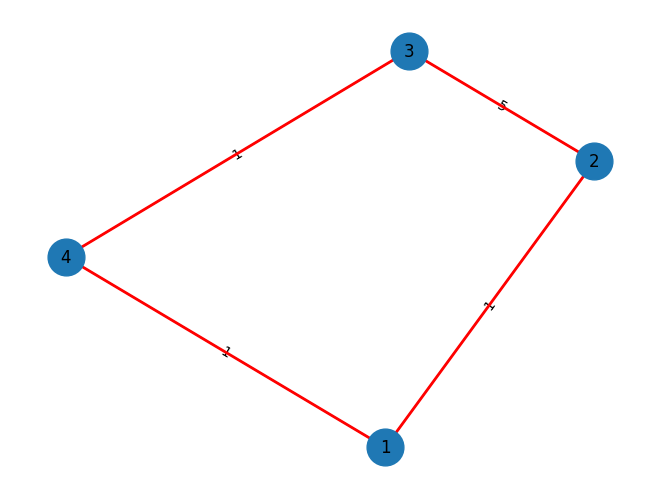

In [15]:
## square = [(1,2,1), (2,3,1), (3,4,1), (4,1,1)]
cpp = ChinesePostman()
cpp.add_node(1, 2, 1)
cpp.add_node(2, 3, 5)
cpp.add_node(3, 4, 1)
cpp.add_node(4, 1, 1)

total_cost, path = cpp.solve()
print(f"Total cost: {total_cost}")
print(f"Path: {' -> '.join(map(str, path))}")
cpp.plot_route(path)

Total cost: 23
Path: 1 -> 2 -> 3 -> 1 -> 4 -> 3 -> 1


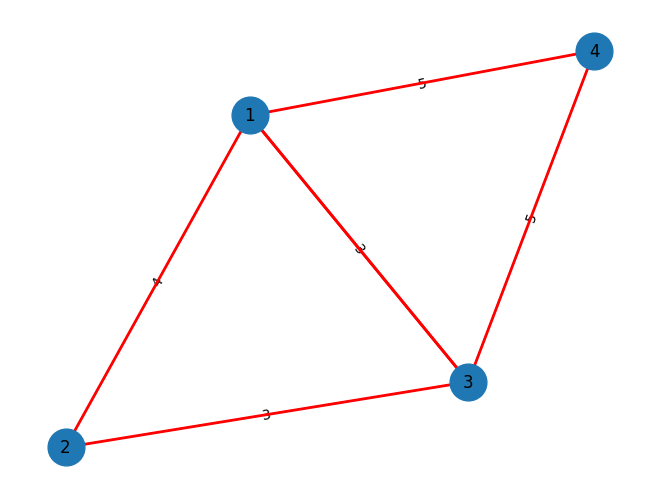

In [16]:
## ice_cream = [(1,2,4), (1,3,3), (1,4,5), (2,3,3), (3,4,5)]
cpp = ChinesePostman()
cpp.add_node(1, 2, 4)
cpp.add_node(1, 3, 3)
cpp.add_node(1, 4, 5)
cpp.add_node(2, 3, 3)
cpp.add_node(3, 4, 5)

total_cost, path = cpp.solve()
print(f"Total cost: {total_cost}")
print(f"Path: {' -> '.join(map(str, path))}")

cpp.plot_route(path)